In [1]:
!pip install mysql-connector-python pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import mysql.connector 
import seaborn as sns
import matplotlib.pyplot as plt 

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\3402261054.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# firstly import csv file from dataset 
df_customer = pd.read_csv("datasets/customers.csv")
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [4]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [5]:
df_customer.sample()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
449,450,Anika Rathod,Female,24,Suburb,Fullstack Developer,NaN,Married


In [6]:
df_customer.shape

(1000, 8)

In [7]:
# import mysql database in jpandas 
conn = mysql.connector.connect(
    user='root',
    password='coders12345',  # Use your actual password
    host='127.0.0.1',
    port=3306,
    database='e_master_card'
)

query = "SELECT * FROM e_master_card.customers;"
df_cust = pd.read_sql(query, conn)
df_cust.head()


C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\3096536386.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cust = pd.read_sql(query, conn)


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [8]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [9]:
df_cust.shape

(1000, 8)

In [10]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563,Married
4,5,Advait Malik,Male,48,City,Consultant,39406,Married


In [11]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [12]:
df_cust[df_cust.annual_income .isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [13]:
df_trans = pd.read_csv("datasets/transactions.csv")
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [14]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [15]:
df_trans[df_trans.platform.isna()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [16]:
df_trans.iloc[2:6]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
5,6,527,2023-01-01,38,Shopify,Fashion & Apparel,Debit Card


In [17]:
df_trans.loc[2:5]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
5,6,527,2023-01-01,38,Shopify,Fashion & Apparel,Debit Card


In [18]:
df_customer.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [19]:
df_customer.annual_income.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999    False
Name: annual_income, Length: 1000, dtype: bool

In [20]:
df_customer[df_customer.annual_income.isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


In [21]:
df_customer.annual_income.median()

112218.5

### Removing null values using groupby

In [22]:
df_customer.groupby("occupation")["annual_income"].median()

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [23]:
occupation_wise_mid = df_customer.groupby("occupation")["annual_income"].median()
occupation_wise_mid

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [24]:
occupation_wise_mid["Consultant"]

58017.0

In [25]:
df_customer["annual_income"] = df_customer.apply(
    lambda row: occupation_wise_mid[row["occupation"]] 
                if pd.isnull(row["annual_income"]) 
                else row["annual_income"],
    axis=1
)

In [26]:
df_customer[df_customer.annual_income.isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [27]:
df_customer.annual_income.loc[16:18]

16    141865.0
17     10672.0
18     17575.0
Name: annual_income, dtype: float64

<Axes: xlabel='annual_income', ylabel='Count'>

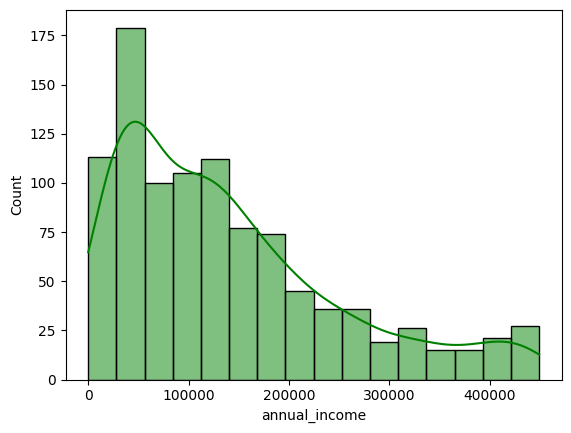

In [28]:
sns.histplot( df_customer.annual_income , kde= True , color= "green" )


### Treating outliers 

In [29]:
df_customer.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


In [30]:
df_customer.annual_income > 100 

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: annual_income, Length: 1000, dtype: bool

In [31]:
df_customer[df_customer.annual_income < 100 ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [32]:
df_customer.shape

(1000, 8)

In [33]:
occupation_mean = df_customer.groupby("occupation")["annual_income"].mean()
occupation_mean

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         264832.787197
Consultant              58909.556701
Data Scientist         135545.907609
Freelancer              76327.508772
Fullstack Developer     78209.567568
Name: annual_income, dtype: float64

### write a function to replace the otliers 

In [34]:
for index , row in df_customer.iterrows():
    if row["annual_income"]< 100 :
        df_customer.at[index , "annual_income"] = occupation_mean[row["occupation"]]

In [35]:
df_customer[df_customer.annual_income < 100 ]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


### Data visualization 

In [36]:
occupation_mean.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [37]:
occupation_mean.values

array([ 64123.5625    ,  45309.23684211, 264832.78719723,  58909.55670103,
       135545.9076087 ,  76327.50877193,  78209.56756757])

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\2419844479.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x=occupation_mean.index , y=occupation_mean.values , palette ="tab10")


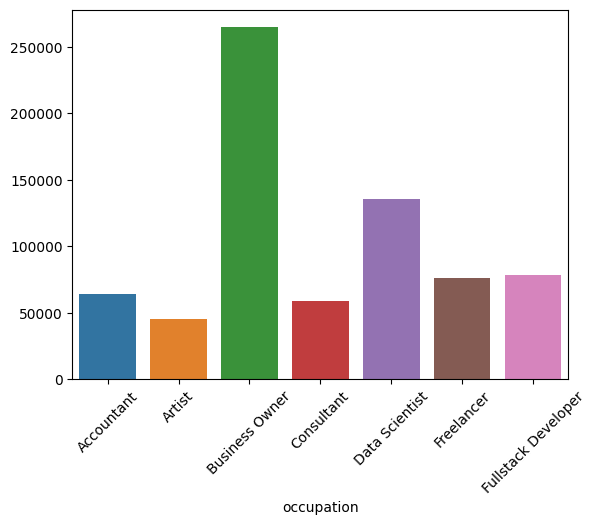

In [38]:
sns.barplot( x=occupation_mean.index , y=occupation_mean.values , palette ="tab10")
plt.xticks(rotation=45)
plt.show() 

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\570179203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( average_income_per_group , palette="tab10")
C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\570179203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( average_income_per_group , palette="tab10")
C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\570179203.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( average_income_per_group , palette="tab10")
C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\570179203.py:5: FutureWarn

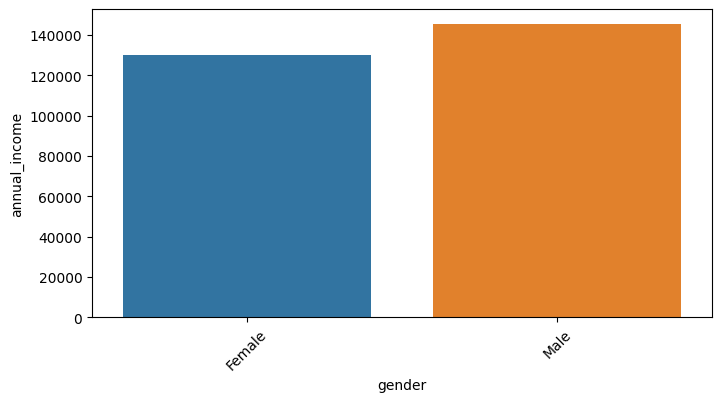

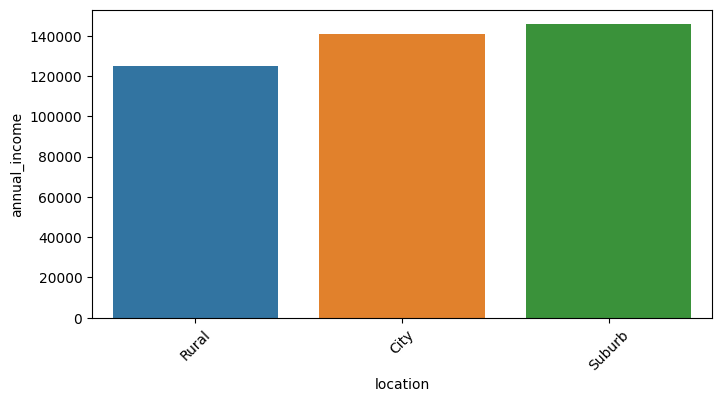

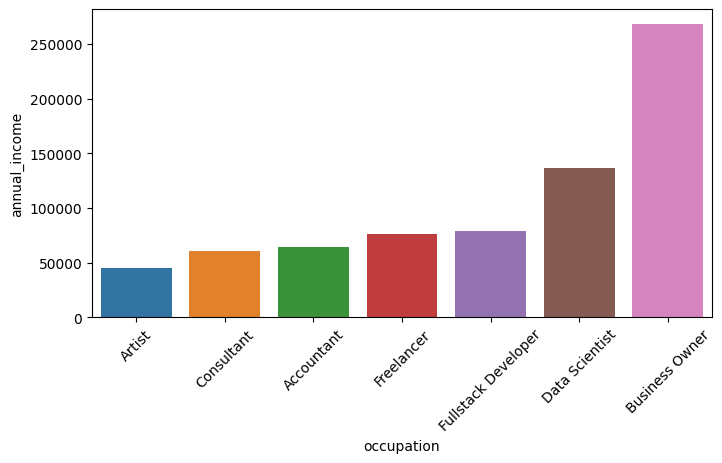

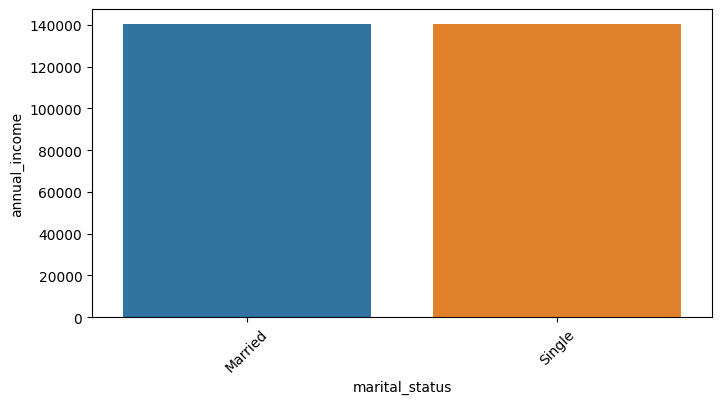

In [39]:
categories_col = [ "gender" , "location" ,  "occupation" , "marital_status" ,]
for column in categories_col : 
    plt.figure(figsize=(8,4))
    average_income_per_group = df_customer.groupby(column)["annual_income"].mean().sort_values()
    sns.barplot( average_income_per_group , palette="tab10")
    plt.xticks(rotation=45)
plt.show()

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\2835690628.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.values, y=avg_income.index, ax=axes[i], palette="tab10")
C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\2835690628.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.values, y=avg_income.index, ax=axes[i], palette="tab10")
C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\2835690628.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income.values, y=avg_income.index, ax=axes[i], palette="tab10"

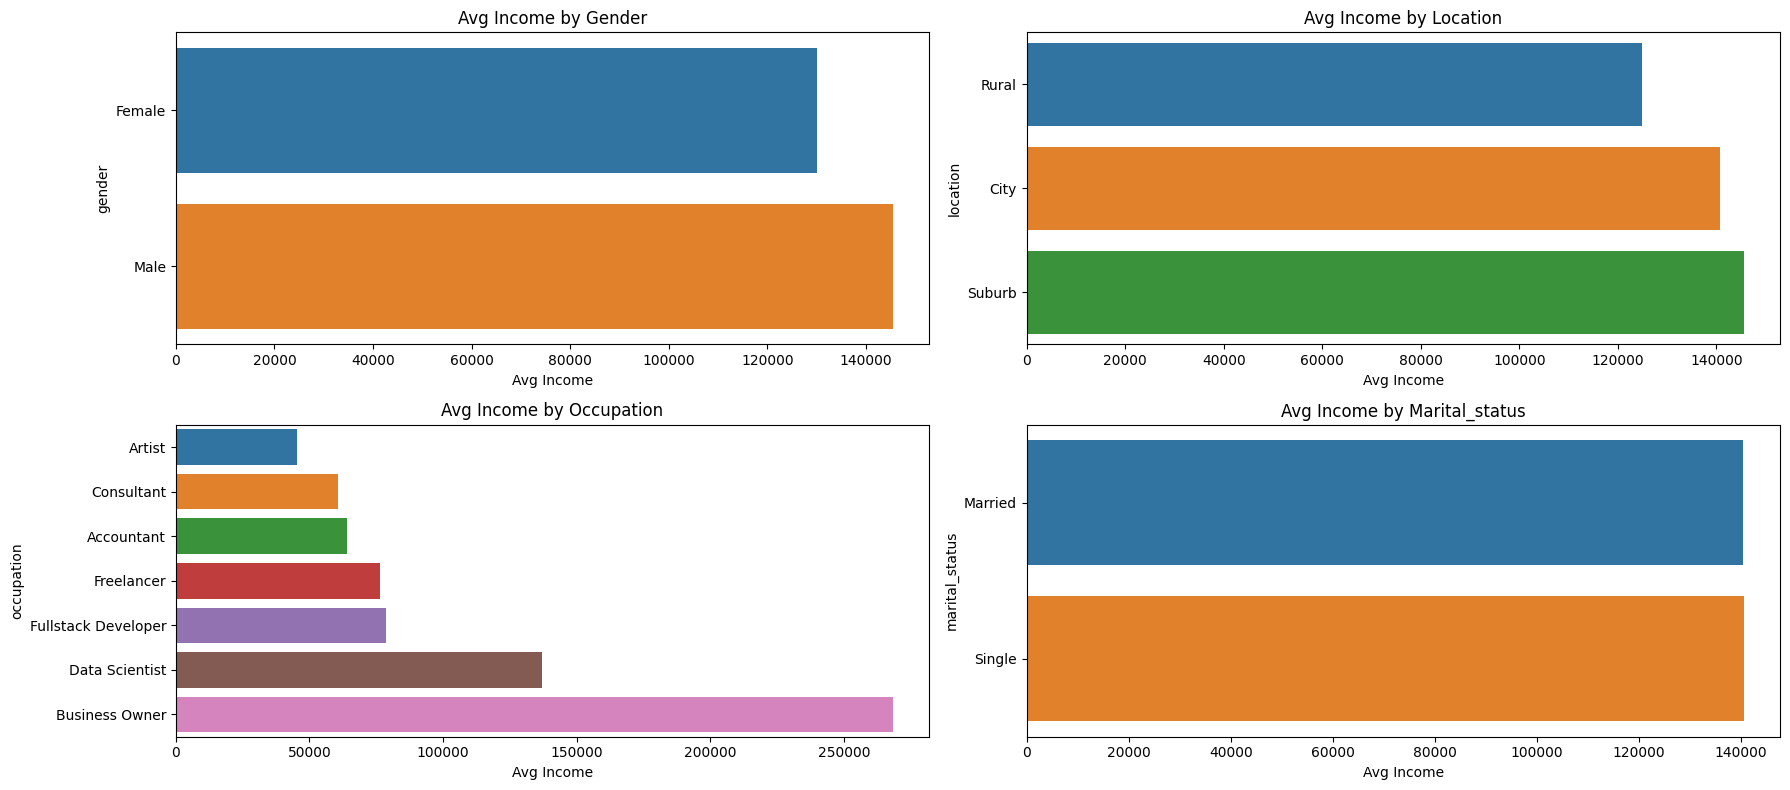

In [40]:
categories_col = ["gender", "location", "occupation", "marital_status"]
fig, axes = plt.subplots(2, 2, figsize=(18, 8))  # Optional: increase height

axes = axes.flatten()  # Flatten the 2x2 matrix into 1D array

for i, column in enumerate(categories_col):
    avg_income = df_customer.groupby(column)["annual_income"].mean().sort_values()
    sns.barplot(x=avg_income.values, y=avg_income.index, ax=axes[i], palette="tab10")
    axes[i].set_title(f"Avg Income by {column.capitalize()}")
    axes[i].set_xlabel("Avg Income")
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

In [41]:
df_customer.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [42]:
df_customer.age.mean()

36.405

In [43]:
df_customer.age.median()

32.0

In [44]:
occupation_wise_age = df_customer.groupby("occupation")["age"].median()

In [45]:
df_age_outliers = df_customer[ (df_customer.age < 18) | (df_customer.age > 65)] 
df_age_outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [46]:
df_age_outliers.shape

(20, 8)

In [47]:
for index , row in df_age_outliers.iterrows() : 
    df_customer.at[ index ,"age"] = occupation_wise_age[row["occupation"]]

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\4042744914.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_customer.at[ index ,"age"] = occupation_wise_age[row["occupation"]]


In [48]:
df_customer[ (df_customer.age < 18) | (df_customer.age > 65)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


### Data visullization age gender and location and also create a pie chart of age and bar chart gender and location wise male and female  

In [49]:
df_customer.age.unique()

array([51. , 47. , 21. , 24. , 48. , 22. , 32. , 27. , 25. , 39. , 36. ,
       26. , 42. , 28. , 31. , 59. , 19. , 20. , 29. , 64. , 50. , 38. ,
       41. , 43. , 62. , 44. , 61. , 23. , 58. , 40. , 18. , 34. , 33. ,
       55. , 46. , 53. , 30. , 56. , 35. , 52. , 60. , 57. , 63. , 45. ,
       54. , 49. , 37. , 31.5, 27.5])

In [50]:
bins_edges = [ 17 , 25 , 48 ,65]
bins_labels = ["18-25" , "26-48" , "49-65"]

df_customer["age_group"] = pd.cut(df_customer["age"] , bins = bins_edges , labels = bins_labels )
df_customer.sample(4)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
386,387,Kabir Pandey,Male,30.0,City,Fullstack Developer,75257.0,Single,26-48
393,394,Aarohi Gavaskar,Female,31.0,City,Data Scientist,148674.0,Married,26-48
896,897,Rudra Choudhary,Male,60.0,City,Business Owner,445385.0,Married,49-65


In [51]:
age_group_count = df_customer.age_group.value_counts(normalize=True)
age_group_count

age_group
26-48    0.567
18-25    0.246
49-65    0.187
Name: proportion, dtype: float64

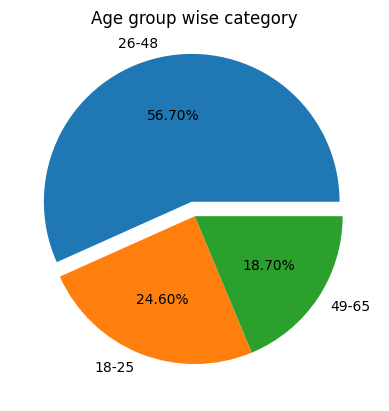

In [52]:
pie_explode = (0.1 , 0,0)

plt.pie(age_group_count , labels = age_group_count.index , autopct = "%1.2f%%" , explode=pie_explode)
plt.title("Age group wise category")
plt.show()

In [53]:
df_customer.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


explode = (0.1, 0, 0)  # Highlight the first slice

plt.pie(
    age_group_count, 
    labels=age_group_count.index, 
    autopct="%1.1f%%", 
    shadow=True, 
    explode=explode
)

plt.title("Group wise age")
plt.show()

In [54]:
df_customer.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [55]:
df_customer.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [56]:
df_customer.groupby(["location" , "gender"]).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [57]:
male_female_gender_loc = df_customer.groupby(["location" , "gender"]).size().unstack()
male_female_gender_loc

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


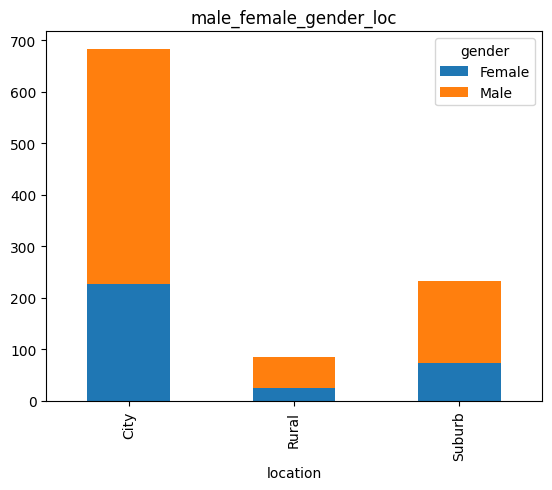

In [58]:
male_female_gender_loc.plot(kind='bar' , stacked =True)
plt.title("male_female_gender_loc")
plt.show()

### explore credit card score 

In [59]:
df_cs = pd.read_csv("datasets/credit_profiles.csv")
df_cs.tail()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0
1003,1000,775,0.696050,33956.0,1.0,60000.0


In [60]:
df_cs.shape

(1004, 6)

In [61]:
df_cs["cust_id"].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [62]:
df_cs[df_cs["cust_id"].duplicated(keep=False)]


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [63]:
df_cs_clean_duplicated = df_cs.drop_duplicates(subset="cust_id" , keep="last")
df_cs_clean_duplicated.head()


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [64]:
df_cs_clean_duplicated.isna().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [65]:
df_cs_clean_duplicated[df_cs_clean_duplicated.credit_limit.isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [66]:
df_cs_clean_duplicated.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

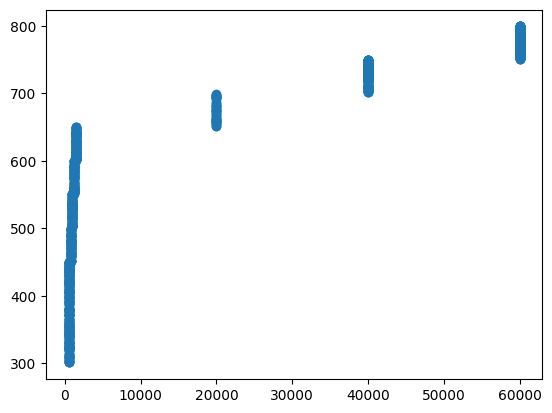

In [67]:
plt.scatter( df_cs_clean_duplicated.credit_limit , df_cs_clean_duplicated.credit_score)

In [68]:
# create a new_column name credit_card_range

bin_ranges = [300 , 450 , 500 , 550 , 600 , 650 , 750 , 800]
bin_labels = [f'{start}-{end}'for start , end in zip(bin_ranges , bin_ranges[1:])]
df_cs_clean_duplicated["credit_score_range"] = pd.cut(df_cs_clean_duplicated["credit_score"] , bins=bin_ranges , labels=bin_labels) 

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\521206741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean_duplicated["credit_score_range"] = pd.cut(df_cs_clean_duplicated["credit_score"] , bins=bin_ranges , labels=bin_labels)


In [69]:
df_cs_clean_duplicated.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,650-750
1,2,587,0.107928,161644.0,2.0,1250.0,550-600
2,3,544,0.854807,513.0,4.0,1000.0,500-550
3,4,504,0.336938,224.0,2.0,1000.0,500-550
4,5,708,0.586151,18090.0,2.0,40000.0,650-750


In [78]:
mode_df = df_cs_clean_duplicated.groupby("credit_score_range")["credit_limit"].agg(lambda x:x.mode().iloc[0]).reset_index()
mode_df

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\2030531264.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mode_df = df_cs_clean_duplicated.groupby("credit_score_range")["credit_limit"].agg(lambda x:x.mode().iloc[0]).reset_index()


,credit_score_range,credit_limit
0,300-450,500.0
1,450-500,750.0
2,500-550,1000.0
3,550-600,1250.0
4,600-650,1500.0
5,650-750,40000.0
6,750-800,60000.0


In [83]:
df_cs_clean =pd.merge( df_cs_clean_duplicated , mode_df , on="credit_score_range" , suffixes=("" , "_mode"))
df_cs_clean.sample(3)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
282,283,638,0.556891,540.0,1.0,1500.0,600-650,1500.0
791,793,727,0.711467,18462.0,4.0,40000.0,650-750,40000.0
693,695,669,0.506786,5071.0,3.0,20000.0,650-750,40000.0


In [84]:
df_cs_clean[df_cs_clean.credit_limit.isna()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
10,11,679,0.557450,9187.0,2.0,NaN,650-750,40000.0
35,36,790,0.112535,4261.0,1.0,NaN,750-800,60000.0
37,38,514,0.296971,238.0,2.0,NaN,500-550,1000.0
45,46,761,0.596041,24234.0,2.0,NaN,750-800,60000.0
64,65,734,0.473715,13631.0,0.0,NaN,650-750,40000.0
...,...,...,...,...,...,...,...,...
907,909,479,0.487555,320.0,3.0,NaN,450-500,750.0
926,928,311,0.832244,316.0,2.0,NaN,300-450,500.0
943,945,526,0.272734,227.0,1.0,NaN,500-550,1000.0
949,951,513,0.175914,131.0,3.0,NaN,500-550,1000.0


In [96]:
df_cs_clean_1 = df_cs_clean.copy()
df_cs_clean_1["credit_limit"].fillna(df_cs_clean_1["credit_limit_mode"] , inplace=True)
df_cs_clean_1

C:\Users\Abuzer\AppData\Local\Temp\ipykernel_7756\1284106337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cs_clean_1["credit_limit"].fillna(df_cs_clean_1["credit_limit_mode"] , inplace=True)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,650-750,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-600,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-550,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-550,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,650-750,40000.0
...,...,...,...,...,...,...,...,...
994,996,564,0.702963,688.0,2.0,1250.0,550-600,1250.0
995,997,774,0.465462,17139.0,0.0,60000.0,750-800,60000.0
996,998,529,0.585856,386.0,3.0,1000.0,500-550,1000.0
997,999,725,0.249670,6973.0,2.0,40000.0,650-750,40000.0


In [97]:
df_cs_clean_1.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.323323,589.471471,0.498663,9692.948949,1.955956,19772.772773,20613.613614
std,288.910029,152.085696,0.233079,25266.811373,1.414944,24730.803560,25062.344205
min,1.000000,301.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.500000,460.000000,0.293785,221.000000,1.000000,750.000000,750.000000
50%,500.000000,602.000000,0.487290,551.000000,2.000000,1500.000000,1500.000000
75%,750.500000,738.000000,0.697670,11839.000000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


<Axes: ylabel='outstanding_debt'>

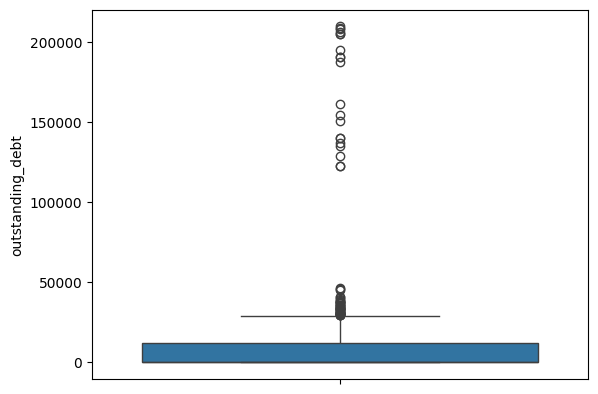

In [98]:
sns.boxplot(df_cs_clean_1.outstanding_debt)	

In [99]:
df_cs_clean_1[df_cs_clean_1.outstanding_debt > df_cs_clean_1.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-600,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-650,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-800,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,650-750,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,650-750,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-450,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,650-750,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,650-750,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-800,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-450,500.0


In [103]:
df_cs_clean_1.loc[df_cs_clean_1.outstanding_debt > df_cs_clean_1.credit_limit , "outstanding_debt"] = df_cs_clean_1["credit_limit"]	

In [104]:
df_cs_clean_1[df_cs_clean_1.outstanding_debt > df_cs_clean_1.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [106]:
df_cs_clean_1.iloc[0]

cust_id                                  1
credit_score                           749
credit_utilisation                0.585171
outstanding_debt                   19571.0
credit_inquiries_last_6_months         0.0
credit_limit                       40000.0
credit_score_range                 650-750
credit_limit_mode                  40000.0
Name: 0, dtype: object

### correlation ship betn various data 

In [107]:
df_cs_clean_1.head(4)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,650-750,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-600,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-550,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-550,1000.0


In [108]:
df_customer.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25


In [111]:
df_merge = df_customer.merge(df_cs_clean_1 , on="cust_id" , how="inner")
df_merge.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,749,0.585171,19571.0,0.0,40000.0,650-750,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,587,0.107928,1250.0,2.0,1250.0,550-600,1250.0


In [115]:
correlation_matrix = df_merge[["credit_score" , "credit_limit" , "annual_income" , "age" , "credit_utilisation" , "outstanding_debt"]].corr()
correlation_matrix

,credit_score,credit_limit,annual_income,age,credit_utilisation,outstanding_debt
credit_score,1.000000,0.848454,0.575844,0.447698,-0.068281,0.680852
credit_limit,0.848454,1.000000,0.684041,0.512144,-0.079399,0.810407
annual_income,0.575844,0.684041,1.000000,0.619988,-0.085657,0.555593
age,0.447698,0.512144,0.619988,1.000000,-0.028897,0.445148
credit_utilisation,-0.068281,-0.079399,-0.085657,-0.028897,1.000000,0.193771
outstanding_debt,0.680852,0.810407,0.555593,0.445148,0.193771,1.000000


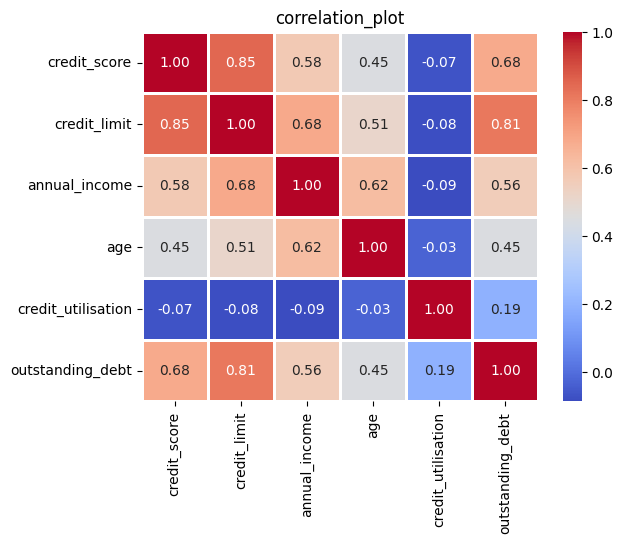

In [121]:
sns.heatmap(correlation_matrix , annot=True , fmt=".2f" , cmap="coolwarm" , linewidths = 0.9 ) 
plt.title("correlation_plot")
plt.show()

 ### Handling null value in df_tans

In [126]:
df_trans = pd.read_csv("datasets/transactions.csv")
df_trans

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,NaN,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [127]:
df_trans.shape

(500000, 7)

In [129]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [136]:
df_trans["platform"].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [130]:
df_trans[df_trans.platform.isna()]   

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [139]:
df_trans.platform.mode()

0    Amazon
Name: platform, dtype: object

In [142]:
df_trans.platform.fillna(df_trans.platform.mode()[0] , inplace=True)

In [143]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

### Finding and traeting outliers

In [144]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [149]:
df_trans[df_trans.tran_amount < 100 ]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
5,6,527,2023-01-01,38,Shopify,Fashion & Apparel,Debit Card
...,...,...,...,...,...,...,...
499986,499987,227,2023-09-05,30,Cred,Fashion & Apparel,Cash
499991,499992,51,2023-09-05,97,Alibaba,Kitchen Appliances,Credit Card
499992,499993,988,2023-09-05,32,Flipkart,Books,Debit Card
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
